In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Open the existing ocean zarr-store
ocn = xr.open_zarr(
    "gs://noaa-ufs-gefsv13replay/ufs-hr1/0.25-degree-subsampled/06h-freq/zarr/mom6.zarr",
    storage_options={"token": "anon"},
)
ocn

<xarray.Dataset> Size: 5TB
Dimensions:       (time: 43826, lat: 192, lon: 384, zl: 75, z_l: 75)
Coordinates:
    cftime        (time) object 351kB dask.array<chunksize=(21913,), meta=np.ndarray>
    ftime         (time) timedelta64[ns] 351kB dask.array<chunksize=(21913,), meta=np.ndarray>
  * lat           (lat) float64 2kB 89.82 88.89 87.95 ... -87.25 -88.18 -89.12
  * lon           (lon) float64 3kB 0.0 0.9375 1.875 2.812 ... 357.2 358.1 359.1
  * time          (time) datetime64[ns] 351kB 1993-12-31T18:00:00 ... 2023-12-31
  * z_l           (z_l) float64 600B 0.5154 1.571 2.687 ... 5.698e+03 5.902e+03
  * zl            (zl) float64 600B 1.0 3.0 5.0 ... 3.591e+03 5.111e+03
Data variables: (12/20)
    Heat_PmE      (time, lat, lon) float32 13GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    LW            (time, lat, lon) float32 13GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    LwLatSens     (time, lat, lon) float32 13GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    SSH           (time, lat, lon) float32 13GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    SW            (time, lat, lon) float32 13GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    evap          (time, lat, lon) float32 13GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    ...            ...
    so            (time, z_l, lat, lon) float32 969GB dask.array<chunksize=(1, 75, 192, 384), meta=np.ndarray>
    taux          (time, lat, lon) float32 13GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    tauy          (time, lat, lon) float32 13GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    temp          (time, z_l, lat, lon) float32 969GB dask.array<chunksize=(1, 75, 192, 384), meta=np.ndarray>
    uo            (time, z_l, lat, lon) float32 969GB dask.array<chunksize=(1, 75, 192, 384), meta=np.ndarray>
    vo            (time, z_l, lat, lon) float32 969GB dask.array<chunksize=(1, 75, 192, 384), meta=np.ndarray>
Attributes:
    abstract:         The NOAA Unified Forecast System (UFS) / Global Ensembl...
    acknowledgement:  To provide appropriate attribution under this license, ...
    description:      This zarr store is a subset of the original GEFSv13 UFS...
    license:          The Global Ensemble Forecast System version 13 (GEFSv13...

In [13]:
# define the normalization urls
norm_urls = {}
norm_urls["ocn"] = {
        "mean": "gcs://noaa-ufs-gefsv13replay/ufs-hr1/0.25-degree-subsampled/06h-freq/zarr/mom6.fvstatistics.l10.1993-2019/mean_by_level.zarr",
        "std": "gcs://noaa-ufs-gefsv13replay/ufs-hr1/0.25-degree-subsampled/06h-freq/zarr/mom6.fvstatistics.l10.1993-2019/stddev_by_level.zarr",
        "stddiff": "gcs://noaa-ufs-gefsv13replay/ufs-hr1/0.25-degree-subsampled/06h-freq/zarr/mom6.fvstatistics.l10.1993-2019/diffs_stddev_by_level.zarr",
    }

In [14]:
norm_urls["atm"] = {
        "mean": "gcs://noaa-ufs-gefsv13replay/ufs-hr1/0.25-degree-subsampled/06h-freq/zarr/fv3.fvstatistics.trop16.1993-2019/mean_by_level.zarr",
        "std": "gcs://noaa-ufs-gefsv13replay/ufs-hr1/0.25-degree-subsampled/06h-freq/zarr/fv3.fvstatistics.trop16.1993-2019/stddev_by_level.zarr",
        "stddiff": "gcs://noaa-ufs-gefsv13replay/ufs-hr1/0.25-degree-subsampled/06h-freq/zarr/fv3.fvstatistics.trop16.1993-2019/diffs_stddev_by_level.zarr",
    }

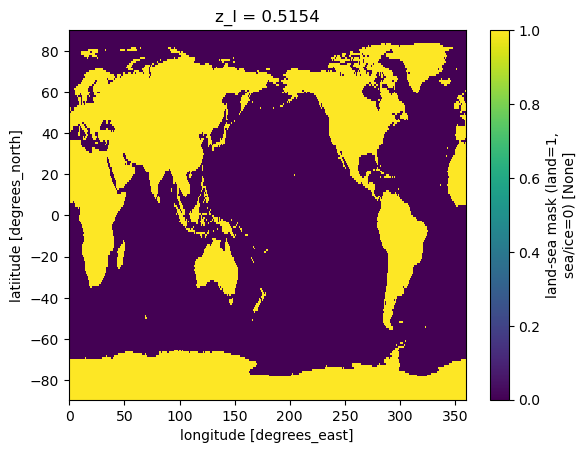

In [6]:
# get the land sea mask
landsea_mask = ocn.landsea_mask

# Plot any level
landsea_mask.isel(z_l=0).plot()
plt.show()

In [16]:
landsea_mask_mean = landsea_mask.mean(dim=("lat", "lon"))
landsea_mask_mean.values

array([0.3530816 , 0.3530816 , 0.3530816 , 0.3530816 , 0.3530816 ,
       0.3530816 , 0.3530816 , 0.3530816 , 0.35740831, 0.35823568,
       0.35936144, 0.36064996, 0.36246745, 0.36412218, 0.36612956,
       0.3681505 , 0.3704834 , 0.3734809 , 0.37638346, 0.37920464,
       0.38175456, 0.38434516, 0.38675944, 0.38967556, 0.39237467,
       0.39457194, 0.39702691, 0.39945475, 0.40192329, 0.40414768,
       0.40671115, 0.40950521, 0.41191949, 0.41471354, 0.41723633,
       0.42016602, 0.42286513, 0.42580838, 0.42902289, 0.43181695,
       0.43471951, 0.43792046, 0.44015842, 0.44232856, 0.44476997,
       0.44742839, 0.45014106, 0.45321994, 0.45711263, 0.46176487,
       0.46643066, 0.47200521, 0.47790527, 0.48400879, 0.49123806,
       0.5       , 0.50853136, 0.51888021, 0.53271484, 0.5485026 ,
       0.56749132, 0.59058974, 0.61645508, 0.64613173, 0.68070475,
       0.71759711, 0.75770399, 0.80254449, 0.83920627, 0.8722602 ,
       0.90637207, 0.93926324, 0.96516927, 0.98254395, 0.99309

In [10]:
landsea_mask_std = landsea_mask.std(dim=("lat", "lon"))
landsea_mask_std.values

array([0.4779278 , 0.4779278 , 0.4779278 , 0.4779278 , 0.4779278 ,
       0.4779278 , 0.4779278 , 0.4779278 , 0.47923649, 0.47948188,
       0.47981329, 0.48018909, 0.4807128 , 0.48118314, 0.48174548,
       0.48230251, 0.48293421, 0.48372814, 0.48447802, 0.48518912,
       0.48581685, 0.48644009, 0.48700778, 0.48767665, 0.48827942,
       0.48875855, 0.48928166, 0.48978633, 0.49028661, 0.49072633,
       0.4912201 , 0.49174251, 0.49218068, 0.49267253, 0.4931026 ,
       0.49358539, 0.49401438, 0.49446497, 0.49493661, 0.49532926,
       0.49572014, 0.49613116, 0.49640607, 0.49666287, 0.49694028,
       0.49722854, 0.49750788, 0.49780682, 0.49815728, 0.49853593,
       0.49887183, 0.49921568, 0.49951158, 0.49974422, 0.49992322,
       0.5       , 0.49992721, 0.49964341, 0.49892859, 0.49764194,
       0.49542398, 0.49172502, 0.48624913, 0.47816892, 0.4662036 ,
       0.4501683 , 0.42847246, 0.39807893, 0.36734058, 0.33379986,
       0.29131039, 0.23884683, 0.18335089, 0.13096313, 0.08280

In [32]:
# The first values of the above array should ne nearly same as those statistics 
# for the land_static variable
atm_mean = xr.open_zarr(norm_urls["atm"]["mean"], storage_options={"token":"anon"})
atm_mean.land_static

<xarray.DataArray 'land_static' ()> Size: 8B
[1 values with dtype=float64]
Attributes:
    description:  average over ['grid_yt', 'grid_xt']
    long_name:    static land-sea/ice mask

In [33]:
atm_std = xr.open_zarr(norm_urls["atm"]["std"], storage_options={"token":"anon"})
atm_std.land_static

<xarray.DataArray 'land_static' ()> Size: 8B
[1 values with dtype=float64]
Attributes:
    description:  standard deviation over ['grid_yt', 'grid_xt']
    long_name:    static land-sea/ice mask

In [34]:
landsea_mask_mean

<xarray.DataArray 'landsea_mask' (z_l: 75)> Size: 600B
dask.array<mean_agg-aggregate, shape=(75,), dtype=float64, chunksize=(75,), chunktype=numpy.ndarray>
Coordinates:
  * z_l      (z_l) float64 600B 0.5154 1.571 2.687 ... 5.698e+03 5.902e+03
Attributes:
    long_name:    land-sea mask (land=1, sea/ice=0)
    description:  average over ['lat', 'lon']
    units:        None

In [49]:
landsea_mask_std

<xarray.DataArray 'landsea_mask' (z_l: 75)> Size: 600B
dask.array<_sqrt, shape=(75,), dtype=float64, chunksize=(75,), chunktype=numpy.ndarray>
Coordinates:
  * z_l      (z_l) float64 600B 0.5154 1.571 2.687 ... 5.698e+03 5.902e+03
Attributes:
    long_name:    land-sea mask (land=1, sea/ice=0)
    description:  standard deviation over ['lat', 'lon']
    units:        None

In [35]:
# assign attributes to the mean and std values of the landsea_mask
landsea_mask_mean = landsea_mask_mean.assign_attrs(long_name="land-sea mask (land=1, sea/ice=0)", 
                                                   description="average over ['lat', 'lon']", 
                                                   units="None",)

landsea_mask_std = landsea_mask_std.assign_attrs(long_name="land-sea mask (land=1, sea/ice=0)", 
                                                 description="standard deviation over ['lat', 'lon']", 
                                                 units="None",)

In [36]:
landsea_mask_mean

<xarray.DataArray 'landsea_mask' (z_l: 75)> Size: 600B
dask.array<mean_agg-aggregate, shape=(75,), dtype=float64, chunksize=(75,), chunktype=numpy.ndarray>
Coordinates:
  * z_l      (z_l) float64 600B 0.5154 1.571 2.687 ... 5.698e+03 5.902e+03
Attributes:
    long_name:    land-sea mask (land=1, sea/ice=0)
    description:  average over ['lat', 'lon']
    units:        None

In [50]:
landsea_mask_std

<xarray.DataArray 'landsea_mask' (z_l: 75)> Size: 600B
dask.array<_sqrt, shape=(75,), dtype=float64, chunksize=(75,), chunktype=numpy.ndarray>
Coordinates:
  * z_l      (z_l) float64 600B 0.5154 1.571 2.687 ... 5.698e+03 5.902e+03
Attributes:
    long_name:    land-sea mask (land=1, sea/ice=0)
    description:  standard deviation over ['lat', 'lon']
    units:        None

In [39]:
# Encodings
# chunks
landsea_mask_mean.encoding["chunks"] = landsea_mask_mean.shape
landsea_mask_std.encoding["chunks"] = landsea_mask_std.shape

# preferred_chunks
preferred_chunks = {key:value for key, value in zip(landsea_mask_mean.dims, landsea_mask_mean.shape)}
landsea_mask_mean.encoding["preferred_chunks"] = preferred_chunks

preferred_chunks = {key:value for key, value in zip(landsea_mask_std.dims, landsea_mask_std.shape)}
landsea_mask_std.encoding["preferred_chunks"] = preferred_chunks

In [42]:
print(landsea_mask_mean.encoding)
print(landsea_mask_std.encoding)

{'chunks': (75,), 'preferred_chunks': {'z_l': 75}}
{'chunks': (75,), 'preferred_chunks': {'z_l': 75}}


In [43]:
# convert to dataset and copy the original global attributes
# Note: copying the global attributes of the original ocn dataset is necessary
# as xarray.to_zarr(mode="a") provides precedence to the new global attrs
# over the attrs of the dataset you are appending to. Here is a git issue on this:
# https://github.com/pydata/xarray/issues/8755

# open the ocean mean statistics
ocn_mean = xr.open_zarr(norm_urls["ocn"]["mean"], storage_options={"token":"anon"})

landsea_mask_mean_ds = landsea_mask_mean.to_dataset(name="landsea_mask",)
landsea_mask_mean_ds.attrs = ocn_mean.attrs.copy()

In [51]:
landsea_mask_mean_ds

<xarray.Dataset> Size: 1kB
Dimensions:       (z_l: 75)
Coordinates:
  * z_l           (z_l) float64 600B 0.5154 1.571 2.687 ... 5.698e+03 5.902e+03
Data variables:
    landsea_mask  (z_l) float64 600B dask.array<chunksize=(75,), meta=np.ndarray>

In [54]:
# open the ocean std statistics
ocn_std = xr.open_zarr(norm_urls["ocn"]["std"], storage_options={"token":"anon"})

landsea_mask_std_ds = landsea_mask_std.to_dataset(name="landsea_mask",)
landsea_mask_std_ds.attrs = ocn_std.attrs.copy()

In [55]:
landsea_mask_std_ds

<xarray.Dataset> Size: 1kB
Dimensions:       (z_l: 75)
Coordinates:
  * z_l           (z_l) float64 600B 0.5154 1.571 2.687 ... 5.698e+03 5.902e+03
Data variables:
    landsea_mask  (z_l) float64 600B dask.array<chunksize=(75,), meta=np.ndarray>

In [ ]:
# Append to existing zarr stores
landsea_mask_mean_ds.to_zarr(norm_urls["ocn"]["mean"], 
                        mode="a", consolidated=True,
                        storage_options={"token":"/location/to/replay-service-account.json"})

landsea_mask_std_ds.to_zarr(norm_urls["ocn"]["std"], 
                        mode="a", consolidated=True,
                        storage_options={"token":"/location/to/replay-service-account.json"})